In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline
from scipy.stats import scoreatpercentile
import math

pd.options.display.float_format = '{:,.2f}'.format

# jobs_dataframe.csv
# job_tasks_dataframe.csv
# flat_dataframe.csv

In [2]:
df = pd.read_csv('flat_dataframe.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c68198860>,
      dtype=object)

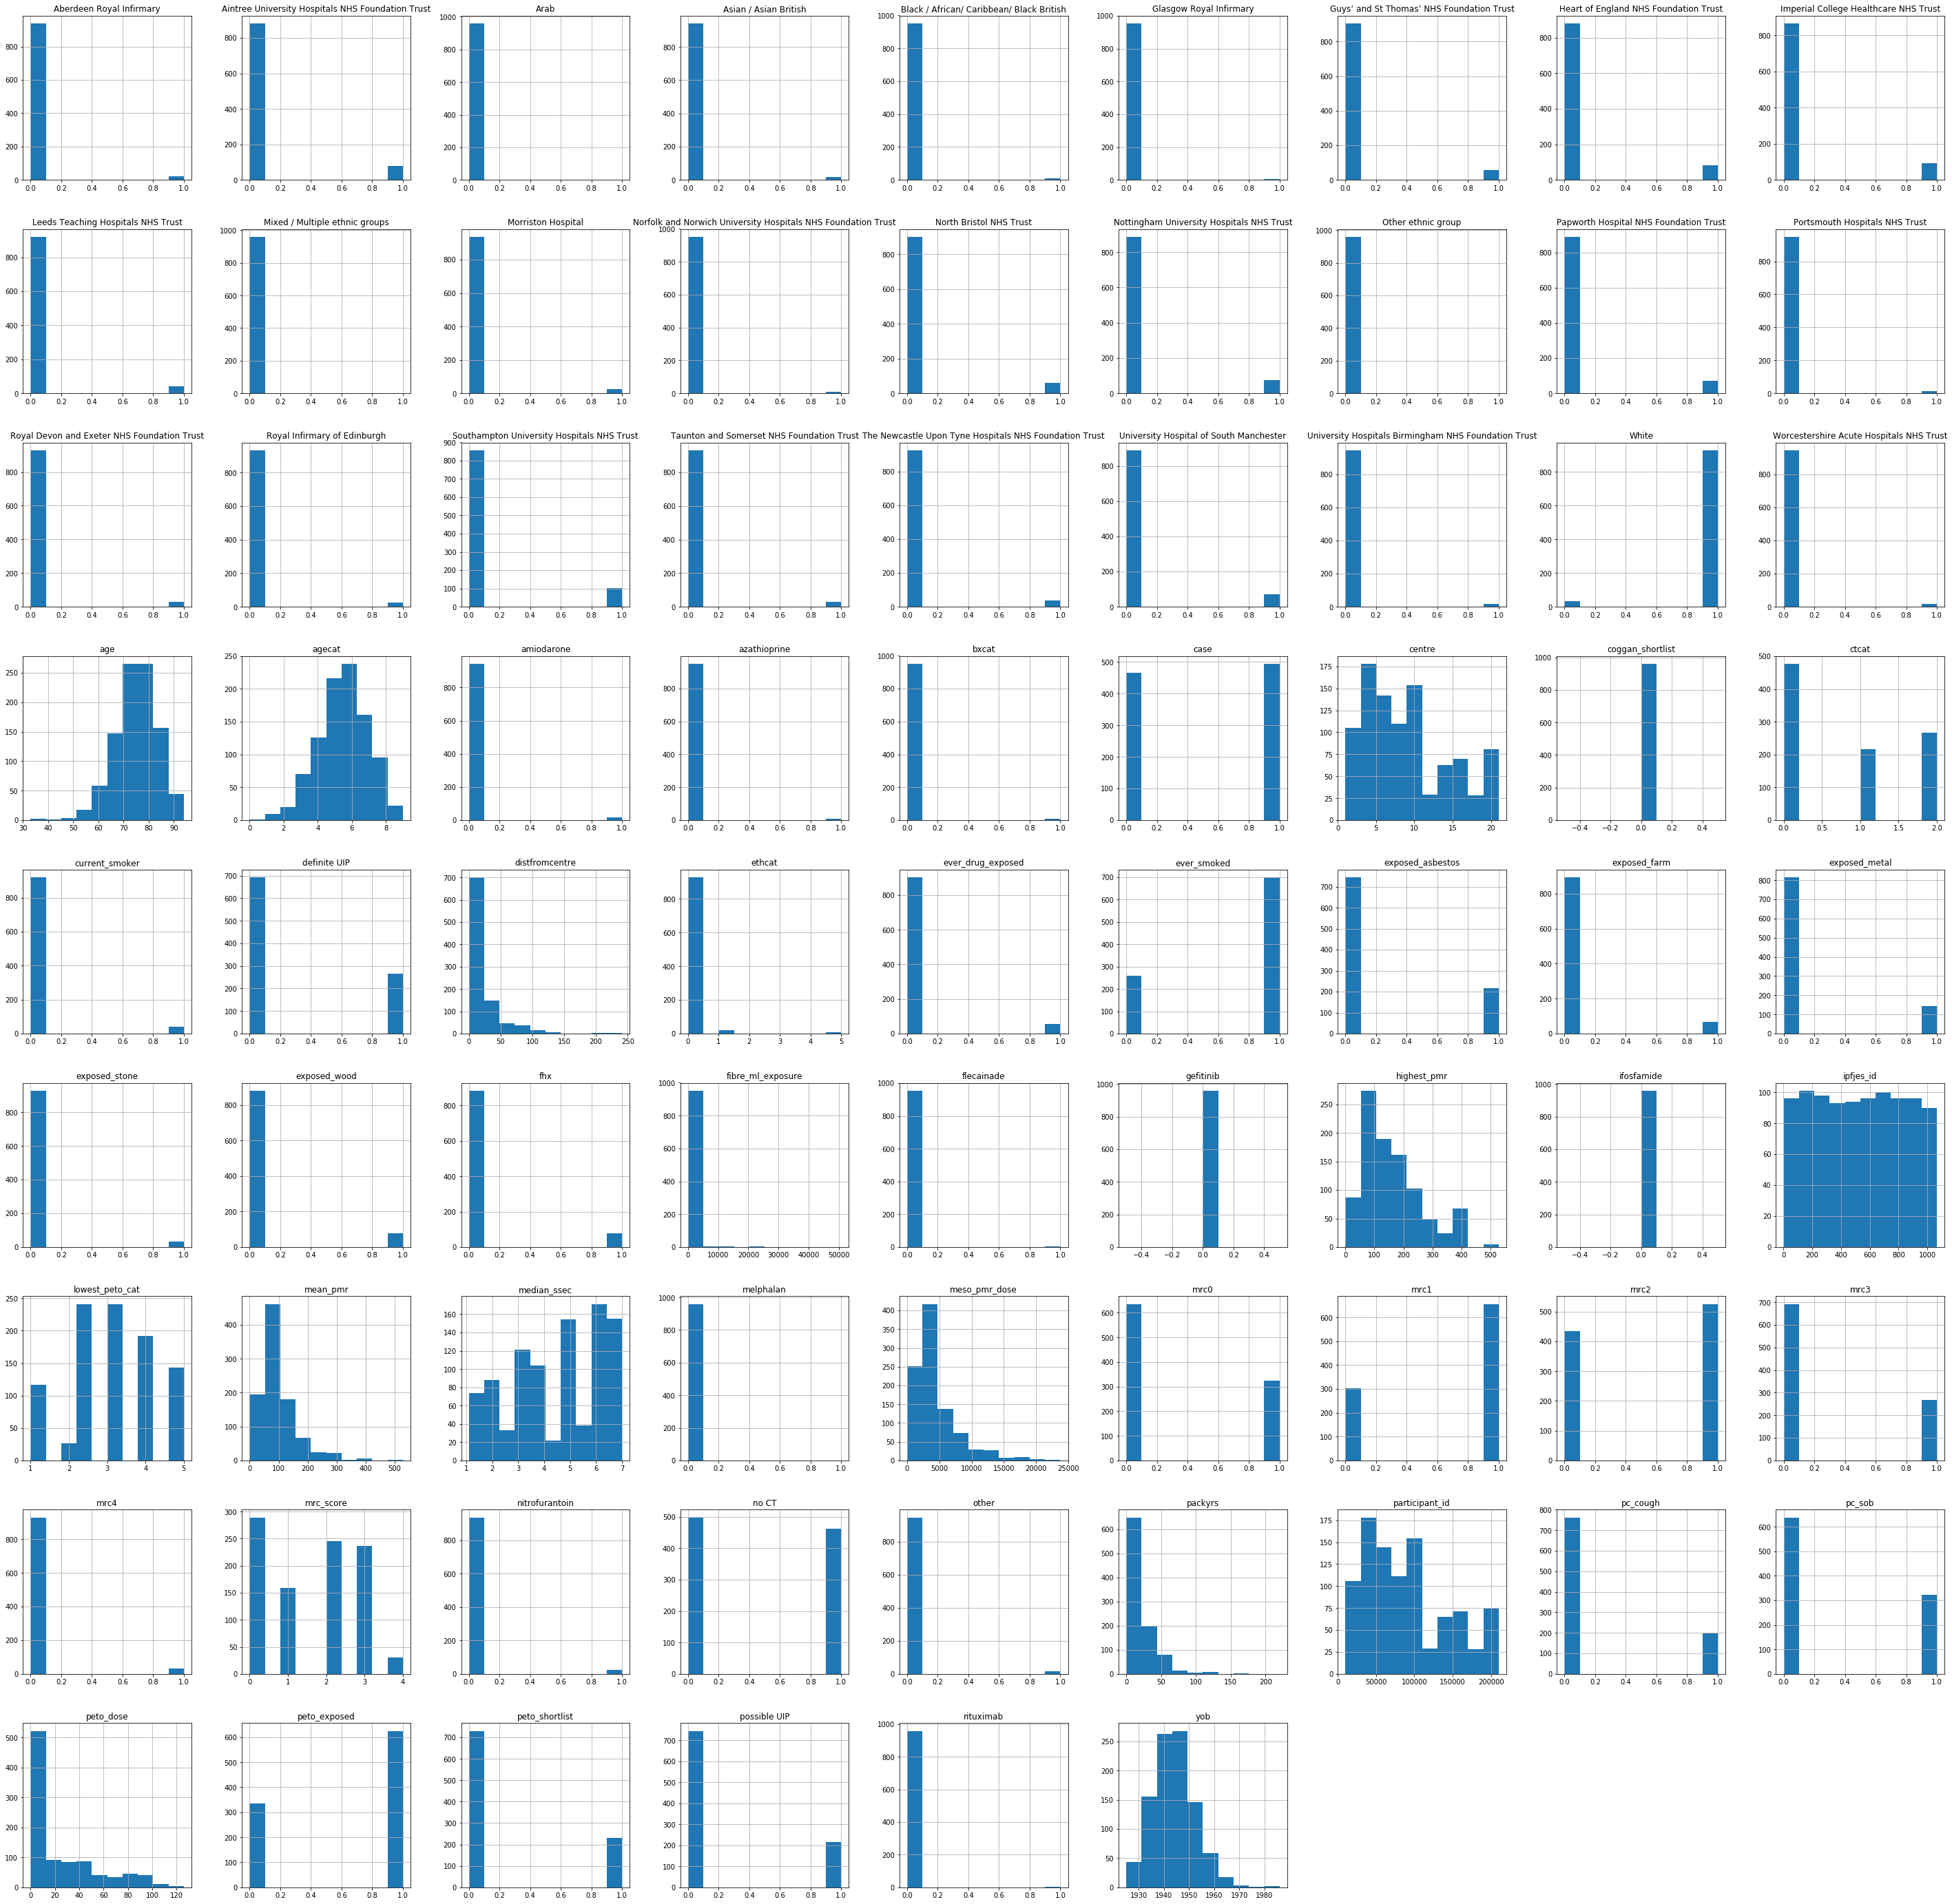

In [3]:
# histograms
df.hist(figsize=(50,50))

In [4]:
# correlation coefficients
df.corr()

,ipfjes_id,case,age,yob,ever_smoked,current_smoker,packyrs,participant_id,centre,distfromcentre,...,Asian / Asian British,Black / African/ Caribbean/ Black British,Mixed / Multiple ethnic groups,Other ethnic group,White,definite UIP,no CT,other,possible UIP,ever_drug_exposed
ipfjes_id,1.00,-0.48,-0.06,0.06,-0.04,0.04,-0.05,0.20,0.20,-0.08,...,-0.02,0.09,-0.03,0.00,-0.03,-0.29,0.48,0.03,-0.27,0.01
case,-0.48,1.00,0.13,-0.13,0.06,-0.11,0.05,0.07,0.07,0.22,...,0.02,-0.06,0.03,-0.05,0.02,0.60,-0.99,0.07,0.52,-0.13
age,-0.06,0.13,1.00,-1.00,-0.06,-0.19,-0.10,-0.03,-0.03,-0.02,...,-0.02,0.00,0.01,-0.02,0.02,0.11,-0.13,-0.03,0.04,-0.05
yob,0.06,-0.13,-1.00,1.00,0.06,0.20,0.10,0.03,0.03,0.02,...,0.03,-0.01,-0.01,0.02,-0.03,-0.11,0.13,0.03,-0.05,0.05
ever_smoked,-0.04,0.06,-0.06,0.06,1.00,0.13,0.45,0.07,0.07,-0.00,...,-0.05,-0.04,-0.05,-0.02,0.07,0.05,-0.06,0.02,0.01,-0.01
current_smoker,0.04,-0.11,-0.19,0.20,0.13,1.00,0.15,-0.03,-0.03,-0.06,...,-0.03,0.03,-0.01,-0.01,-0.02,-0.08,0.11,-0.03,-0.04,-0.05
packyrs,-0.05,0.05,-0.10,0.10,0.45,0.15,1.00,0.06,0.06,-0.03,...,-0.04,-0.03,-0.02,-0.01,0.06,-0.02,-0.06,0.01,0.09,-0.05
participant_id,0.20,0.07,-0.03,0.03,0.07,-0.03,0.06,1.00,1.00,-0.04,...,0.00,0.04,0.00,-0.02,-0.02,0.04,-0.08,0.05,0.03,-0.03
centre,0.20,0.07,-0.03,0.03,0.07,-0.03,0.06,1.00,1.00,-0.04,...,0.00,0.04,0.00,-0.02,-0.02,0.04,-0.08,0.05,0.03,-0.03
distfromcentre,-0.08,0.22,-0.02,0.02,-0.00,-0.06,-0.03,-0.04,-0.04,1.00,...,0.02,-0.05,0.04,-0.03,0.01,0.14,-0.22,-0.02,0.12,0.00


,case,age,yob,distfromcentre,ever_smoked,packyrs,median_ssec,fhx,meso_pmr_dose,highest_pmr,mean_pmr,lowest_peto_cat,peto_dose,fibre_ml_exposure,exposed_stone,exposed_wood,exposed_metal,exposed_asbestos,exposed_farm,ever_drug_exposed
case,1,0.13,-0.13,0.22,0.06,0.055,0.046,0.1,0.0044,0.05,0.024,-0.042,-0.0021,0.029,0.087,0.056,0.078,0.022,0.041,-0.13
age,0.13,1,-1,-0.021,-0.061,-0.097,-0.096,-0.081,0.14,0.056,0.067,-0.061,0.032,0.00073,-0.021,-0.016,-0.038,-0.076,0.08,-0.052
yob,-0.13,-1,1,0.022,0.061,0.098,0.096,0.081,-0.14,-0.057,-0.067,0.061,-0.031,-0.0011,0.022,0.017,0.038,0.077,-0.079,0.052
distfromcentre,0.22,-0.021,0.022,1,-0.0016,-0.029,-0.054,0.066,-0.055,-0.023,-0.049,0.047,-0.068,0.029,0.0023,-0.056,-0.087,-0.049,0.1,0.0032
ever_smoked,0.06,-0.061,0.061,-0.0016,1,0.45,0.17,0.0051,-0.0079,0.05,-0.017,-0.12,0.071,0.048,0.048,0.029,0.035,0.097,0.017,-0.0056
packyrs,0.055,-0.097,0.098,-0.029,0.45,1,0.18,0.073,-0.042,0.025,-0.026,-0.1,0.078,0.051,-0.014,-0.0047,0.041,0.07,0.024,-0.048
median_ssec,0.046,-0.096,0.096,-0.054,0.17,0.18,1,0.032,0.09,0.15,0.079,-0.39,0.29,0.041,0.089,0.097,0.19,0.16,0.16,-0.1
fhx,0.1,-0.081,0.081,0.066,0.0051,0.073,0.032,1,-0.023,-0.00057,-0.012,-0.038,0.023,0.062,0.032,0.039,0.027,0.037,-0.034,-0.041
meso_pmr_dose,0.0044,0.14,-0.14,-0.055,-0.0079,-0.042,0.09,-0.023,1,0.7,0.86,-0.4,0.67,0.15,-0.0031,0.25,0.11,0.27,-0.086,-0.04
highest_pmr,0.05,0.056,-0.057,-0.023,0.05,0.025,0.15,-0.00057,0.7,1,0.81,-0.56,0.5,0.077,-0.012,0.26,0.22,0.33,-0.043,0.0046


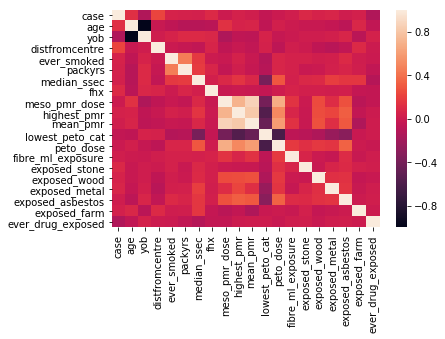

In [5]:
# correlation coefficients for select variables with visual aid
corr = df[['case', 'age', 'yob', 'distfromcentre','ever_smoked', 'packyrs', 'median_ssec', 'fhx', 'meso_pmr_dose', 'highest_pmr', 'mean_pmr', 'lowest_peto_cat',
           'peto_dose', 'fibre_ml_exposure', 'exposed_stone', 'exposed_wood', 'exposed_metal', 'exposed_asbestos',
       'exposed_farm', 'ever_drug_exposed']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


In [6]:
import scipy.stats as stats

stats.pearsonr(df['case'], df['highest_pmr'])

(0.05003207019822594, 0.12134865531231563)

,age,yob,distfromcentre,ever_smoked,packyrs,median_ssec,definite UIP,highest_pmr,mean_pmr,lowest_peto_cat,peto_dose,fibre_ml_exposure,exposed_stone,exposed_wood,exposed_metal,exposed_asbestos,exposed_farm
age,1,-1,-0.027,-0.16,-0.2,-0.2,0.061,0.031,0.039,0.016,-0.011,0.014,-0.036,-0.028,-0.047,-0.096,0.087
yob,-1,1,0.029,0.16,0.2,0.2,-0.06,-0.031,-0.039,-0.015,0.011,-0.015,0.035,0.027,0.047,0.095,-0.087
distfromcentre,-0.027,0.029,1,-0.0032,-0.018,-0.019,0.012,-0.0042,-0.032,0.024,-0.026,0.05,-0.019,-0.07,-0.11,-0.0081,0.1
ever_smoked,-0.16,0.16,-0.0032,1,0.44,0.22,0.03,0.034,-0.029,-0.15,0.077,0.046,0.041,0.028,0.0068,0.12,-0.0078
packyrs,-0.2,0.2,-0.018,0.44,1,0.12,-0.08,-0.0045,-0.049,-0.075,0.045,0.038,-0.018,-0.0082,0.0051,0.035,-0.0051
median_ssec,-0.2,0.2,-0.019,0.22,0.12,1,0.011,0.14,0.065,-0.37,0.25,0.04,0.081,0.092,0.22,0.12,0.15
definite UIP,0.061,-0.06,0.012,0.03,-0.08,0.011,1,0.063,0.054,0.00078,-0.022,0.054,0.058,0.03,-0.047,-0.028,0.045
highest_pmr,0.031,-0.031,-0.0042,0.034,-0.0045,0.14,0.063,1,0.8,-0.55,0.49,0.11,-0.049,0.27,0.19,0.31,-0.033
mean_pmr,0.039,-0.039,-0.032,-0.029,-0.049,0.065,0.054,0.8,1,-0.44,0.6,0.2,-0.039,0.23,0.11,0.27,-0.14
lowest_peto_cat,0.016,-0.015,0.024,-0.15,-0.075,-0.37,0.00078,-0.55,-0.44,1,-0.58,-0.071,-0.1,-0.13,-0.29,-0.26,-0.015


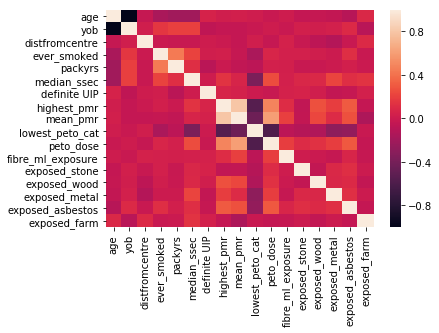

In [7]:
# correlation coefficients for select variables with visual aid for cases only
corr = df[df['case'] == 1][['age', 'yob', 'distfromcentre','ever_smoked', 'packyrs', 'median_ssec', 'definite UIP', 'highest_pmr', 'mean_pmr', 'lowest_peto_cat', 'peto_dose', 
           'fibre_ml_exposure', 'exposed_stone', 'exposed_wood', 'exposed_metal', 'exposed_asbestos',
       'exposed_farm']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,yob,distfromcentre,ever_smoked,packyrs,median_ssec,fhx,highest_pmr,mean_pmr,lowest_peto_cat,peto_dose,fibre_ml_exposure,exposed_stone,exposed_wood,exposed_metal,exposed_asbestos,exposed_farm
age,1,-1,-0.078,0.014,-0.0074,-0.0095,-0.09,0.071,0.091,-0.13,0.075,-0.036,-0.032,-0.02,-0.052,-0.064,0.063
yob,-1,1,0.077,-0.013,0.0083,0.011,0.09,-0.071,-0.091,0.13,-0.073,0.035,0.035,0.023,0.053,0.065,-0.062
distfromcentre,-0.078,0.077,1,-0.028,-0.072,-0.12,0.0071,-0.072,-0.083,0.097,-0.12,-0.035,-0.016,-0.07,-0.1,-0.11,0.083
ever_smoked,0.014,-0.013,-0.028,1,0.47,0.12,0.067,0.062,-0.0078,-0.076,0.066,0.054,0.05,0.023,0.057,0.067,0.041
packyrs,-0.0074,0.0083,-0.072,0.47,1,0.25,0.11,0.056,-0.0017,-0.13,0.12,0.079,-0.022,-0.0073,0.08,0.11,0.058
median_ssec,-0.0095,0.011,-0.12,0.12,0.25,1,0.045,0.17,0.093,-0.41,0.33,0.045,0.1,0.098,0.16,0.2,0.17
fhx,-0.09,0.09,0.0071,0.067,0.11,0.045,1,-0.021,-0.052,-0.049,-0.0043,-0.021,-0.031,-0.023,-0.028,-0.051,-0.058
highest_pmr,0.071,-0.071,-0.072,0.062,0.056,0.17,-0.021,1,0.83,-0.57,0.52,-0.001,0.046,0.24,0.25,0.35,-0.062
mean_pmr,0.091,-0.091,-0.083,-0.0078,-0.0017,0.093,-0.052,0.83,1,-0.48,0.59,0.018,0.013,0.32,0.14,0.33,-0.12
lowest_peto_cat,-0.13,0.13,0.097,-0.076,-0.13,-0.41,-0.049,-0.57,-0.48,1,-0.64,-0.068,-0.068,-0.15,-0.18,-0.36,0.0033


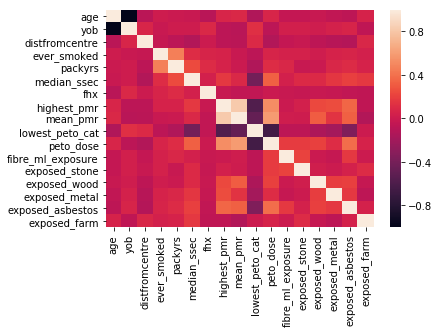

In [8]:
# correlation coefficients for select variables with visual aid for controls only
corr = df[df['case'] == 0][['age', 'yob', 'distfromcentre','ever_smoked', 'packyrs', 'median_ssec', 'fhx', 'highest_pmr', 'mean_pmr', 'lowest_peto_cat', 'peto_dose', 
           'fibre_ml_exposure', 'exposed_stone', 'exposed_wood', 'exposed_metal', 'exposed_asbestos',
       'exposed_farm']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [9]:
"""
cases are, on average, further from the centre as a result of selection
for all participants being closer to the centre is associated with being older, smoking,
having a lower median social class and being exposed to asbestos, wood, metal, and stone dust but not farming
living closer to a centre associated with more fibre ml years asbestos for controls but not cases
"""

'\ncases are, on average, further from the centre as a result of selection\nfor all participants being closer to the centre is associated with being older, smoking,\nhaving a lower median social class and being exposed to asbestos, wood, metal, and stone dust but not farming\nliving closer to a centre associated with more fibre ml years asbestos for controls but not cases\n'

In [10]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1,n2 = len(group1), len(group2)
    
    pooled_var = (n1* var1 + n2 * var2) / (n1+n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [11]:
# cohen's d effect size
for col in df[['age', 'yob', 'distfromcentre','ever_smoked', 'packyrs', 'fhx', 'meso_pmr_dose', 'highest_pmr', 'mean_pmr', 'lowest_peto_cat', 'peto_dose', 
           'fibre_ml_exposure', 'exposed_stone', 'exposed_wood', 'exposed_metal', 'exposed_asbestos',
       'exposed_farm', 'ever_drug_exposed']].columns:
    print(col)
    print(CohenEffectSize(df[df['case'] == 1][col], df[df['case'] == 0][col]))
    print('\n')


age
0.26506223429247244


yob
-0.266246786580557


distfromcentre
0.4499478656148254


ever_smoked
0.12012968457710253


packyrs
0.10940498908074114


fhx
0.19990250312510052


meso_pmr_dose
0.008753690644403463


highest_pmr
0.10012805019977104


mean_pmr
0.047331859435189944


lowest_peto_cat
-0.08483613583357812


peto_dose
-0.004196135901273437


fibre_ml_exposure
0.058515589728152836


exposed_stone
0.17550469866792937


exposed_wood
0.11156221983916742


exposed_metal
0.1561959931758301


exposed_asbestos
0.04362404752230258


exposed_farm
0.08300937572598112


ever_drug_exposed
-0.2546654746916335




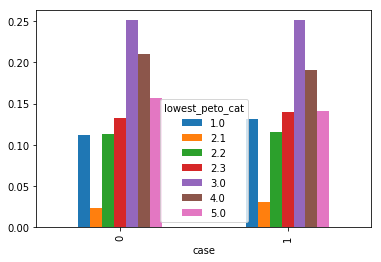

In [12]:
pd.crosstab(df['case'], df['lowest_peto_cat'], rownames=['case'], normalize='index').plot(kind='bar')

In [13]:
import math
df.loc[df['fibre_ml_exposure'] > 0, 'log_fibre_ml_exposure'] = df[df['fibre_ml_exposure'] > 0]['fibre_ml_exposure'].map(lambda x: math.log(x))
df.loc[df['peto_dose'] > 0, 'log_peto_dose'] = df[df['peto_dose'] > 0]['peto_dose'].map(lambda x: math.log(x))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c37cd9da0>,
      dtype=object)

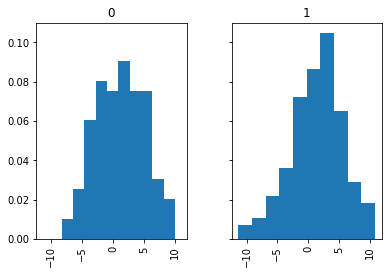

In [14]:
# density = True makes it be a probability mass function, sum of probabilities = 1
# by default hist makes 10 bins
df.hist(column='log_fibre_ml_exposure', by='case', sharex=True, sharey=True, density=True) # fibre_ml years approx log normal?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c37a674e0>,
      dtype=object)

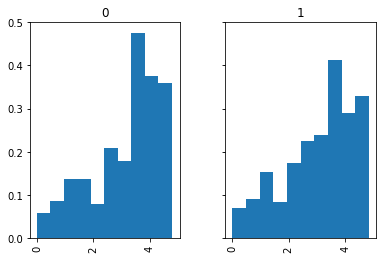

In [15]:
df.hist(column='log_peto_dose', by='case', sharex=True, sharey=True, density=True) # fibre_ml years approx log normal?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c39c739b0>,
      dtype=object)

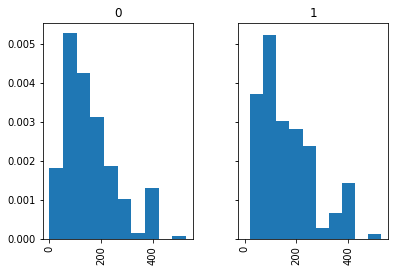

In [16]:
df.hist(column='highest_pmr', by='case', sharex=True, sharey=True, density=True) # fibre_ml years approx log normal?

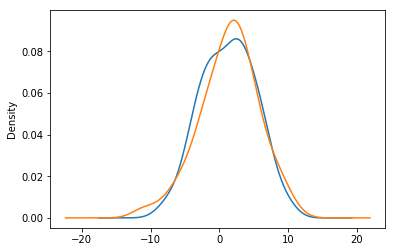

In [17]:
df[df['case'] == 0].log_fibre_ml_exposure.plot.kde()
df[df['case'] == 1].log_fibre_ml_exposure.plot.kde()

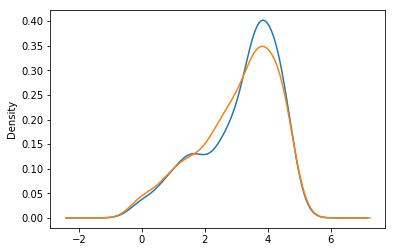

In [18]:
df[df['case'] == 0].log_peto_dose.plot.kde()
df[df['case'] == 1].log_peto_dose.plot.kde()

In [19]:
df.describe().to_csv('descriptive_stats.csv')

In [20]:
df[df.packyrs < 0] # to be fixed

,ipfjes_id,case,dob,age,yob,agegroup,ethnicity,ever_smoked,current_smoker,packyrs,...,Mixed / Multiple ethnic groups,Other ethnic group,White,definite UIP,no CT,other,possible UIP,ever_drug_exposed,log_fibre_ml_exposure,log_peto_dose


In [21]:
def centile_plot(df, col):
    a=list(range(1,101))
    b = [scoreatpercentile(df[col],i) for i in a]
    cent = pd.DataFrame({'percentile': a, 'value': b}, columns=['percentile', 'value'])
    cent.plot(title=col)

/home/drcjar/anaconda3/envs/ipfjes/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


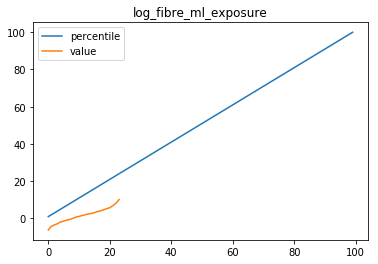

In [22]:
centile_plot(df, 'log_fibre_ml_exposure')

/home/drcjar/anaconda3/envs/ipfjes/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


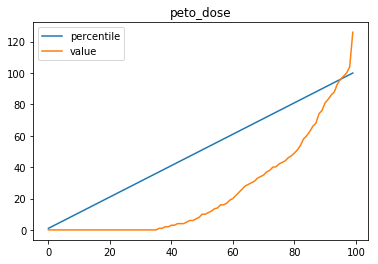

In [23]:
centile_plot(df, 'peto_dose')

In [24]:
df.peto_dose.describe()

count   960.00
mean     23.95
std      30.58
min       0.00
25%       0.00
50%       8.00
75%      40.25
max     126.00
Name: peto_dose, dtype: float64

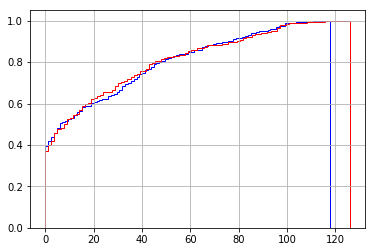

In [25]:
# cumulative distribution function
df[df['case'] == 0].peto_dose.hist(density=True, cumulative=True, histtype=u'step', color= 'b', bins=100)
df[df['case'] == 1].peto_dose.hist(density=True, cumulative=True, histtype=u'step', color= 'r', bins=100)

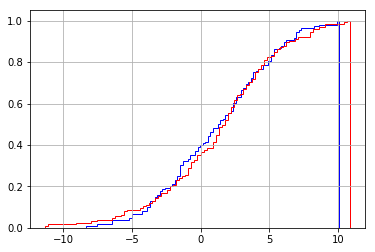

In [26]:
df[df['case'] == 0].log_fibre_ml_exposure.hist(density=True, cumulative=True, histtype=u'step', color= 'b', bins=100)
df[df['case'] == 1].log_fibre_ml_exposure.hist(density=True, cumulative=True, histtype=u'step', color= 'r', bins=100)

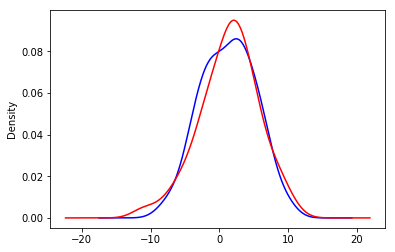

In [27]:
# probability density function estimated using kernel density estimation
df[df['case'] == 0].log_fibre_ml_exposure.plot.kde(color='b')
df[df['case'] == 1].log_fibre_ml_exposure.plot.kde(color='r')

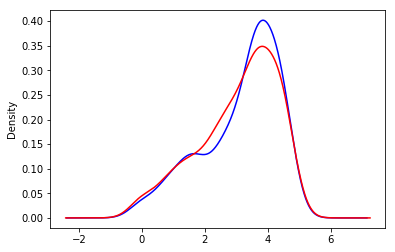

In [28]:
# probability density function estimated using kernel density estimation
df[df['case'] == 0].log_peto_dose.plot.kde(color='b')
df[df['case'] == 1].log_peto_dose.plot.kde(color='r')

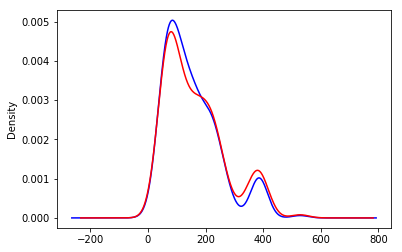

In [29]:
df[df['case'] == 0].highest_pmr.plot.kde(color='b')
df[df['case'] == 1].highest_pmr.plot.kde(color='r')

In [30]:
def make_n_of_cases_and_controls_the_same(df, n):
    """
    makes a random balanced sample
    """
    a = df[df['case'] == 1].drop_duplicates(subset='participant_id').sample(n=n, random_state=1).participant_id.values
    a = df[df.participant_id.isin(a)]
    b = df[df['case'] == 0].drop_duplicates(subset='participant_id').sample(n=n, random_state=1).participant_id.values
    b = df[df.participant_id.isin(b)]
    c = pd.concat([a,b])
    return c

In [31]:
df1 = make_n_of_cases_and_controls_the_same(df,340)

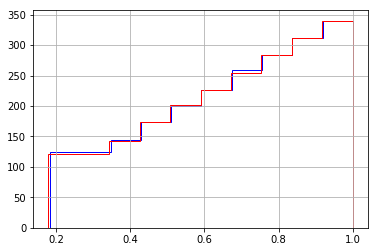

In [32]:
df1[df1['case'] == 0].peto_dose.rank(pct=True).hist(cumulative=True, histtype=u'step', color= 'b')
df1[df1['case'] == 1].peto_dose.rank(pct=True).hist(cumulative=True, histtype=u'step', color= 'r')

In [33]:
df[df['case'] == 0].peto_dose.describe()

count   466.00
mean     24.02
std      30.38
min       0.00
25%       0.00
50%       6.50
75%      42.00
max     118.00
Name: peto_dose, dtype: float64

In [34]:
df[df['case'] == 1].peto_dose.describe()

count   494.00
mean     23.89
std      30.80
min       0.00
25%       0.00
50%       9.00
75%      40.00
max     126.00
Name: peto_dose, dtype: float64

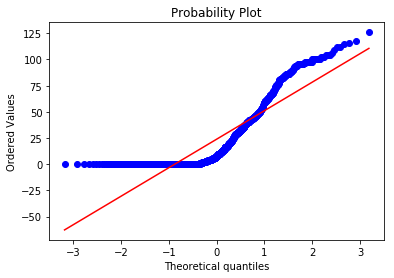

In [35]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.peto_dose
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

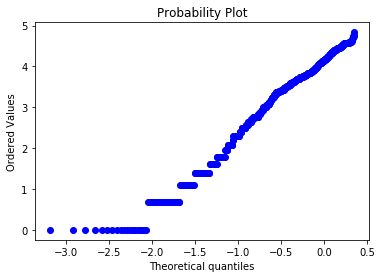

In [36]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.log_peto_dose
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

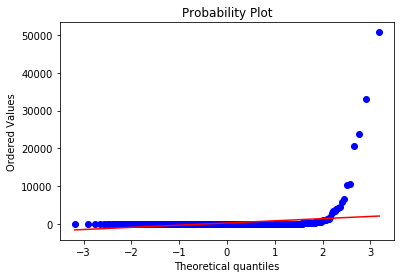

In [37]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.fibre_ml_exposure
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

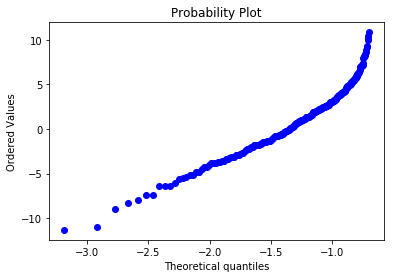

In [38]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.log_fibre_ml_exposure
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [39]:
# peto_dose and fibre_ml_exposure are roughly log normal distributed

In [40]:
df.fibre_ml_exposure.skew()

16.54376132906902

/home/drcjar/anaconda3/envs/ipfjes/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c376ee8d0>,
      dtype=object)

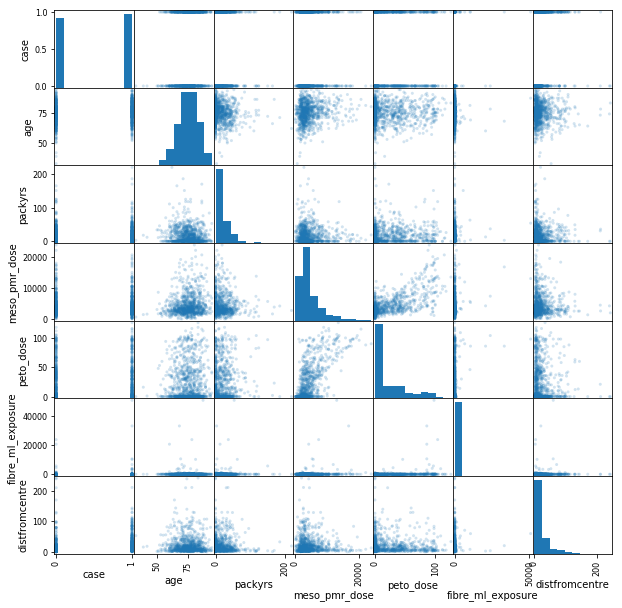

In [41]:
pd.scatter_matrix(df[['case', 'age', 'packyrs', 'meso_pmr_dose', 'peto_dose', 'fibre_ml_exposure', 'distfromcentre']], alpha=0.2, figsize=(10,10))

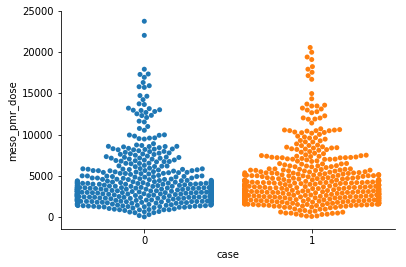

In [42]:
sns.swarmplot('case', 'meso_pmr_dose', data=df)
sns.despine()

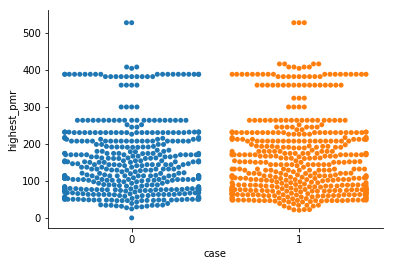

In [43]:
sns.swarmplot('case', 'highest_pmr', data=df)
sns.despine()

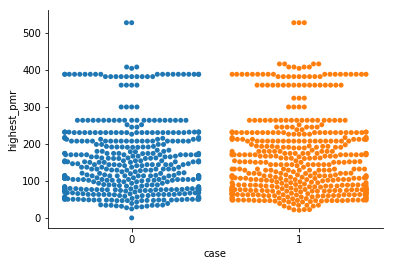

In [44]:
sns.swarmplot('case', 'highest_pmr', data=df)
sns.despine()

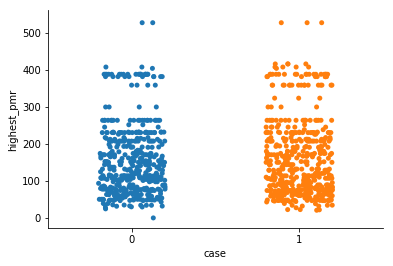

In [45]:
sns.stripplot('case', 'highest_pmr', data=df, jitter=0.2)
sns.despine()

In [46]:
df[['case', 'log_fibre_ml_exposure']].corr()

,case,log_fibre_ml_exposure
case,1.00,0.01
log_fibre_ml_exposure,0.01,1.00


In [47]:
df.cov()

,ipfjes_id,case,age,yob,ever_smoked,current_smoker,packyrs,participant_id,centre,distfromcentre,...,Mixed / Multiple ethnic groups,Other ethnic group,White,definite UIP,no CT,other,possible UIP,ever_drug_exposed,log_fibre_ml_exposure,log_peto_dose
ipfjes_id,"93,821.06",-73.13,-164.17,162.98,-5.51,2.72,-368.55,"3,410,556.31",340.54,-652.38,...,-0.32,0.03,-1.56,-39.67,72.85,0.99,-34.17,0.58,-27.71,-12.13
case,-73.13,0.25,0.54,-0.54,0.01,-0.01,0.67,"2,075.42",0.21,3.02,...,0.00,-0.00,0.00,0.13,-0.25,0.00,0.11,-0.01,0.03,-0.02
age,-164.17,0.54,68.21,-68.15,-0.22,-0.32,-19.69,"-14,748.30",-1.47,-4.85,...,0.00,-0.01,0.03,0.42,-0.54,-0.03,0.15,-0.10,-2.15,0.20
yob,162.98,-0.54,-68.15,68.11,0.22,0.32,19.81,"14,557.06",1.46,4.90,...,-0.00,0.01,-0.04,-0.41,0.54,0.03,-0.16,0.10,2.17,-0.19
ever_smoked,-5.51,0.01,-0.22,0.22,0.20,0.01,4.95,"1,755.73",0.18,-0.02,...,-0.00,-0.00,0.01,0.01,-0.01,0.00,0.00,-0.00,0.04,-0.01
current_smoker,2.72,-0.01,-0.32,0.32,0.01,0.04,0.72,-301.40,-0.03,-0.33,...,-0.00,-0.00,-0.00,-0.01,0.01,-0.00,-0.00,-0.00,0.00,-0.01
packyrs,-368.55,0.67,-19.69,19.81,4.95,0.72,598.28,"84,152.41",8.42,-19.63,...,-0.02,-0.01,0.25,-0.18,-0.72,0.03,0.87,-0.28,5.27,1.26
participant_id,"3,410,556.31","2,075.42","-14,748.30","14,557.06","1,755.73",-301.40,"84,152.41","3,107,801,019.97","310,826.91","-63,536.26",...,4.18,-54.18,-228.14,"1,115.98","-2,092.16",354.83,621.35,-344.74,"14,196.83","-2,740.12"
centre,340.54,0.21,-1.47,1.46,0.18,-0.03,8.42,"310,826.91",31.09,-6.35,...,0.00,-0.01,-0.02,0.11,-0.21,0.04,0.06,-0.03,1.42,-0.27
distfromcentre,-652.38,3.02,-4.85,4.90,-0.02,-0.33,-19.63,"-63,536.26",-6.35,756.38,...,0.03,-0.03,0.06,1.70,-2.99,-0.06,1.34,0.02,6.81,-1.62


In [48]:
#reorderjobcat = {1.:6 , 2.2:4, 3.:1 , 2.1:3, 2.3:5, 5.:1 , 4.:2}
reorderjobcat = {1.:5 , 2.2:4, 3.:3 , 2.1:4, 2.3:4, 5.:1 , 4.:2}
df['lowest_peto_cat_reordered'] = df.lowest_peto_cat.map(reorderjobcat) # make it so highest n is highest exposed

In [49]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [50]:
df.columns

Index(['ipfjes_id', 'case', 'dob', 'age', 'yob', 'agegroup', 'ethnicity',
       'ever_smoked', 'current_smoker', 'packyrs', 'participant_id', 'centre',
       'gp_coords', 'centre_coords', 'distfromcentre', 'ct', 'bx', 'fhx',
       'amiodarone', 'flecainade', 'nitrofurantoin', 'azathioprine',
       'gefitinib', 'ifosfamide', 'melphalan', 'rituximab', 'mrc0', 'mrc1',
       'mrc2', 'mrc3', 'mrc4', 'pc_sob', 'pc_cough', 'pc_incidental',
       'pc_incidental_desc', 'pc_other', 'comments', 'mrc_score',
       'peto_exposed', 'exposed_stone', 'exposed_wood', 'exposed_metal',
       'exposed_farm', 'exposed_asbestos', 'peto_dose', 'median_ssec',
       'fibre_ml_exposure', 'lowest_peto_cat', 'peto_shortlist',
       'coggan_shortlist', 'mean_pmr', 'highest_pmr', 'meso_pmr_dose',
       'agecat', 'ethcat', 'ctcat', 'bxcat', 'centre_name',
       'Aberdeen Royal Infirmary',
       'Aintree University Hospitals NHS Foundation Trust',
       'Glasgow Royal Infirmary', 'Guys’ and St Thomas’ N

In [51]:
df[['case', 'age', 'ever_smoked', 'peto_exposed', 'centre_name']].head()

,case,age,ever_smoked,peto_exposed,centre_name
0,1,65,1,1,Aintree University Hospitals NHS Foundation Trust
1,0,78,0,0,Imperial College Healthcare NHS Trust
2,1,72,1,1,Imperial College Healthcare NHS Trust
3,1,72,1,1,Heart of England NHS Foundation Trust
4,1,79,1,1,The Newcastle Upon Tyne Hospitals NHS Foundati...


In [52]:
model = smf.logit('case ~  peto_exposed ', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.692050
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:               0.0009703
Time:                        15:56:45   Log-Likelihood:                -664.37
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                    0.2560
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0418      0.109     -0.382      0.702      -0.256       0.172
peto_exposed     0.1539

In [53]:
model = smf.logit('case ~ age + ever_smoked + peto_exposed + C(centre_name)', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.631310
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      936
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.08865
Time:                        15:56:45   Log-Likelihood:                -606.06
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 9.869e-15
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------

In [54]:
df.groupby('case')['lowest_peto_cat_reordered'].value_counts(sort=False, normalize=True)

case  lowest_peto_cat_reordered
0     1                           0.16
      2                           0.21
      3                           0.25
      4                           0.27
      5                           0.11
1     1                           0.14
      2                           0.19
      3                           0.25
      4                           0.29
      5                           0.13
Name: lowest_peto_cat_reordered, dtype: float64

In [55]:
df.groupby('case')['lowest_peto_cat_reordered'].value_counts(sort=False)

case  lowest_peto_cat_reordered
0     1                             73
      2                             98
      3                            117
      4                            126
      5                             52
1     1                             70
      2                             94
      3                            124
      4                            141
      5                             65
Name: lowest_peto_cat_reordered, dtype: int64

In [56]:
df[['lowest_peto_cat', 'lowest_peto_cat_reordered']]

,lowest_peto_cat,lowest_peto_cat_reordered
0,2.30,4
1,5.00,1
2,2.20,4
3,2.30,4
4,2.30,4
5,2.30,4
6,2.20,4
7,2.10,4
8,3.00,3
9,2.10,4


In [57]:
model = smf.logit('case ~ age + ever_smoked + C(lowest_peto_cat)', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
print (np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.680921
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      951
Method:                           MLE   Df Model:                            8
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.01704
Time:                        15:56:46   Log-Likelihood:                -653.68
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                  0.003832
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -2.6503      0.686     -3.862      0.000      -3.

In [58]:
model = smf.logit('case ~  C(lowest_peto_cat_reordered)', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.691772
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      955
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.001371
Time:                        15:56:46   Log-Likelihood:                -664.10
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                    0.7682
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.0420      0.167     -0

In [59]:
model = smf.logit('case ~ age + ever_smoked + C(lowest_peto_cat_reordered)', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.681051
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      953
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.01685
Time:                        15:56:46   Log-Likelihood:                -653.81
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                  0.001021
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -2.7451      0.648     -4

In [60]:
model = smf.logit('case ~ age + ever_smoked + log_fibre_ml_exposure', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
print (np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.684354
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  233
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.008877
Time:                        15:56:46   Log-Likelihood:                -159.45
converged:                       True   LL-Null:                       -160.88
                                        LLR p-value:                    0.4143
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.8678      1.279     -1.461      0.144      -4.374       0.

In [61]:
model = smf.logit('case ~ peto_exposed', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
print (np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.692050
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:               0.0009703
Time:                        15:56:46   Log-Likelihood:                -664.37
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                    0.2560
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0418      0.109     -0.382      0.702      -0.256       0.172
peto_exposed     0.1539

In [62]:
model = smf.logit('case ~ exposed_wood', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.691155
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.002261
Time:                        15:56:46   Log-Likelihood:                -663.51
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                   0.08288
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0250      0.067      0.371      0.711      -0.107       0.157
exposed_wood     0.4122

In [63]:
model = smf.logit('case ~ exposed_metal', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.689663
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.004416
Time:                        15:56:46   Log-Likelihood:                -662.08
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                   0.01537
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0074      0.070     -0.105      0.916      -0.145       0.130
exposed_metal     0.

In [64]:
model = smf.logit('case ~ exposed_stone', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
params = results.params
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.688706
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.005797
Time:                        15:56:46   Log-Likelihood:                -661.16
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                  0.005490
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0259      0.066      0.394      0.694      -0.103       0.155
exposed_stone     1.

In [65]:
model = smf.logit('case ~ fibre_ml_exposure', data=df)
results = model.fit()
print(results.summary())
print ("Odds Ratios")
print ("======================")
print (np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.692268
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:               0.0006551
Time:                        15:56:46   Log-Likelihood:                -664.58
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                    0.3506
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0527      0.065      0.812      0.417      -0.074       0.180
fibre_ml

In [66]:
model = smf.logit('case ~ age + C(lowest_peto_cat_reordered, Treatment(reference=1))', data=df)
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.683140
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      954
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.01383
Time:                        15:56:47   Log-Likelihood:                -655.81
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                  0.002487
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept     

In [67]:
model = smf.logit('case ~ age + packyrs + fhx + distfromcentre\
+ meso_pmr_dose + fibre_ml_exposure + exposed_stone + exposed_wood\
+ exposed_metal + exposed_asbestos + exposed_farm', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.635504
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      948
Method:                           MLE   Df Model:                           11
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.08260
Time:                        15:56:47   Log-Likelihood:                -610.08
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 1.956e-18
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.9362      0.676     -5.826      0.000      -5.260      -2.612
age     

In [68]:
df['exposed_smw'] = 0

In [69]:
# stone, metal, wood
df.loc[(df['exposed_stone'] == 1) | (df['exposed_metal'] == 1) | (df['exposed_wood'] == 1), 'exposed_smw'] = 1

In [70]:
df.groupby('case')['exposed_stone'].value_counts()

case  exposed_stone
0     0                458
      1                  8
1     0                470
      1                 24
Name: exposed_stone, dtype: int64

In [71]:
df.groupby('case')['exposed_smw'].value_counts()

case  exposed_smw
0     0              382
      1               84
1     0              355
      1              139
Name: exposed_smw, dtype: int64

In [72]:
model = smf.logit('case ~ exposed_smw ', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.685493
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.01043
Time:                        15:56:47   Log-Likelihood:                -658.07
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 0.0001950
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0733      0.074     -0.994      0.320      -0.218       0.071
exposed_smw     0.5770    

In [73]:
model = smf.logit('case ~ age + ever_smoked + exposed_stone + C(centre_name)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.627901
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      936
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.09357
Time:                        15:56:47   Log-Likelihood:                -602.79
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 6.529e-16
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------

In [74]:
model = smf.logit('case ~ age + ever_smoked + exposed_wood + C(centre_name)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.630555
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      936
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.08974
Time:                        15:56:48   Log-Likelihood:                -605.33
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 5.421e-15
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------

In [75]:
model = smf.logit('case ~ age + ever_smoked + exposed_metal + C(centre_name)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.630158
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      936
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.09032
Time:                        15:56:48   Log-Likelihood:                -604.95
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 3.954e-15
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------

In [76]:
model = smf.logit('case ~ age + ever_smoked + exposed_stone + C(centre_name)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.627901
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      936
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.09357
Time:                        15:56:48   Log-Likelihood:                -602.79
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 6.529e-16
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------

In [77]:
model = smf.logit('case ~ age + ever_smoked + peto_exposed + C(centre_name)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.631310
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      936
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.08865
Time:                        15:56:48   Log-Likelihood:                -606.06
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 9.869e-15
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------

In [78]:
df.columns

Index(['ipfjes_id', 'case', 'dob', 'age', 'yob', 'agegroup', 'ethnicity',
       'ever_smoked', 'current_smoker', 'packyrs', 'participant_id', 'centre',
       'gp_coords', 'centre_coords', 'distfromcentre', 'ct', 'bx', 'fhx',
       'amiodarone', 'flecainade', 'nitrofurantoin', 'azathioprine',
       'gefitinib', 'ifosfamide', 'melphalan', 'rituximab', 'mrc0', 'mrc1',
       'mrc2', 'mrc3', 'mrc4', 'pc_sob', 'pc_cough', 'pc_incidental',
       'pc_incidental_desc', 'pc_other', 'comments', 'mrc_score',
       'peto_exposed', 'exposed_stone', 'exposed_wood', 'exposed_metal',
       'exposed_farm', 'exposed_asbestos', 'peto_dose', 'median_ssec',
       'fibre_ml_exposure', 'lowest_peto_cat', 'peto_shortlist',
       'coggan_shortlist', 'mean_pmr', 'highest_pmr', 'meso_pmr_dose',
       'agecat', 'ethcat', 'ctcat', 'bxcat', 'centre_name',
       'Aberdeen Royal Infirmary',
       'Aintree University Hospitals NHS Foundation Trust',
       'Glasgow Royal Infirmary', 'Guys’ and St Thomas’ N

In [79]:
model = smf.logit('case ~ age + ever_smoked + C(lowest_peto_cat) + C(centre_name)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.630423
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  960
Model:                          Logit   Df Residuals:                      931
Method:                           MLE   Df Model:                           28
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.08993
Time:                        15:56:48   Log-Likelihood:                -605.21
converged:                       True   LL-Null:                       -665.01
                                        LLR p-value:                 2.715e-13
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------

In [80]:
import psycopg2 as pg

def dict_from_db():
    """
    Returns a dict of dataframes from the database tables
    which are populated by the study application
    """
    conn = pg.connect("dbname='carlplaying' user='drcjar' password='drcjar_is_not_fake'")

    cursor = conn.cursor()
    cursor.execute("select relname from pg_class where relkind='r' and relname !~ '^(pg_|sql_)';")
    e = cursor.fetchall()

    table_name_list = [i[0] for i in e]

    select_template = 'SELECT * FROM {table_name}'
    frames_dict = {}
    for tname in table_name_list:
        query = select_template.format(table_name = tname)
        frames_dict[tname] = pd.read_sql(query, conn)
    return frames_dict

ddf = dict_from_db() # dict of dataframes


def removed():
    """
    Print information about removed participants
    """
    rm = ddf['ipfjes_removalreason'][ddf['ipfjes_removalreason'].reason_fk_id.notnull()].copy() 

    # add participant_id
    ct_lookup = ddf['ipfjes_demographics'].loc[:,['patient_id', 'hospital_number']].copy()
    ct_lookup.index = ct_lookup['patient_id'].copy()
    ct_lookup = ct_lookup['hospital_number'].to_dict()
    rm['participant_id'] = rm['episode_id'].map(ct_lookup)

    # add participant type
    pt_lookup = ddf['ipfjes_studyparticipantdetails'].loc[:,['episode_id', 'participant_type']].copy()
    pt_lookup.index = pt_lookup['episode_id']
    pt_lookup = pt_lookup['participant_type'].to_dict()
    rm['case'] = rm['episode_id'].map(pt_lookup)
    
    removal_reasons = ddf['ipfjes_reasonforremoval']
    removal_reasons.index = removal_reasons['id']
    removal_reasons = removal_reasons['name'].to_dict()
    removal_reasons[4] = 'no response after 3 attempts' # to fix a coding duplicate
    rm['reason'] = rm['reason_fk_id'].map(removal_reasons)
    return rm



In [81]:
gt = pd.read_csv('genotyping_cleaned.csv')

transforms = {'Heterozygous':'(G;T)', 'Homozygous Allele 1':'(G;G)', 'Homozygous Allele 2':'(T;T)',
       'Homozygous Allele 1 ':'(G;G)', 'Homoxygous Allele 1':'(G;G)',
       ' Homozygous Allele 2':'(T;T)', ' Homozygous Allele 1':'(G;G)'}
gt.genotype = gt.genotype.map(transforms)

transforms = {"(G;G)":0, "(G;T)":1, "(T;T)":2}

gt.genotype = gt.genotype.map(transforms) # change genotype to 0,1,2 (assumes additive model)

# add genotype
genotype_lookup = gt[['participant_id', 'genotype']]
genotype_lookup.index = genotype_lookup['participant_id']
genotype_lookup = genotype_lookup['genotype'].to_dict()

df['genotype'] = df.participant_id.map(genotype_lookup)

In [82]:
# genotype cleaning ends

In [83]:
len(df[df['genotype'].notnull()]) # number genotyped with exposure data

818

In [84]:
df = df[df['genotype'].notnull()] # restrict analysis to participants with exposure data and genotype

In [85]:
df.case.value_counts()

0    423
1    395
Name: case, dtype: int64

In [86]:
# df = make_n_of_cases_and_controls_the_same(df,307) # sensitivity analysis

In [87]:
df.groupby('case').genotype.value_counts()

case  genotype
0     0.00        327
      1.00         91
      2.00          5
1     1.00        212
      0.00        152
      2.00         31
Name: genotype, dtype: int64

In [88]:
df.groupby('case').genotype.value_counts(normalize=True)

case  genotype
0     0.00       0.77
      1.00       0.22
      2.00       0.01
1     1.00       0.54
      0.00       0.38
      2.00       0.08
Name: genotype, dtype: float64

In [89]:
model = smf.logit('case ~ genotype', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.610733
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1182
Time:                        15:56:50   Log-Likelihood:                -499.58
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 5.832e-31
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7488      0.097     -7.741      0.000      -0.938      -0.559
genotype       1.5385      0.

In [90]:
model = smf.logit('case ~ C(genotype, Treatment(reference=0))', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.610000
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      815
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1192
Time:                        15:56:50   Log-Likelihood:                -498.98
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 4.677e-30
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                   

In [91]:
model = smf.logit('case ~ age + ever_smoked + peto_exposed*genotype', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.601585
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      812
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1314
Time:                        15:56:50   Log-Likelihood:                -492.10
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 2.360e-30
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.1065      0.747     -4.157      0.000      -4.571      -1.

In [92]:
df.groupby('case').exposed_stone.value_counts()

case  exposed_stone
0     0                415
      1                  8
1     0                375
      1                 20
Name: exposed_stone, dtype: int64

In [93]:
df.groupby('case').exposed_stone.value_counts(normalize=True)

case  exposed_stone
0     0               0.98
      1               0.02
1     0               0.95
      1               0.05
Name: exposed_stone, dtype: float64

In [94]:
model = smf.logit('case ~ peto_exposed + genotype', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.609922
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      815
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1193
Time:                        15:56:51   Log-Likelihood:                -498.92
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 4.386e-30
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.8720      0.145     -6.002      0.000      -1.157      -0.587
peto_exposed     0.1850

In [95]:
model = smf.logit('case ~ C(genotype)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.610000
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      815
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1192
Time:                        15:56:51   Log-Likelihood:                -498.98
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 4.677e-30
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.7661      0.098     -7.804      0.000      -0.958      -0.574
C(gen

In [96]:
model = smf.logit('case ~ C(genotype)*peto_exposed', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.607990
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      812
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1221
Time:                        15:56:51   Log-Likelihood:                -497.34
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 3.995e-28
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.7777      0.169     -4.597  

In [97]:
model = smf.logit('case ~ highest_pmr', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.692192
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:               0.0005329
Time:                        15:56:51   Log-Likelihood:                -566.21
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                    0.4371
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1545      0.131     -1.179      0.238      -0.411       0.102
highest_pmr     0.0005    

In [98]:
model = smf.logit('case ~ yob + genotype + ever_smoked + fhx + distfromcentre\
+ meso_pmr_dose + fibre_ml_exposure + exposed_stone + exposed_wood\
+ exposed_metal + exposed_asbestos + exposed_farm', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.551152
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      805
Method:                           MLE   Df Model:                           12
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.2042
Time:                        15:56:51   Log-Likelihood:                -450.84
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 1.047e-42
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            84.9084     20.322      4.178      0.000      45.078     124.738
yob     

In [99]:
model = smf.logit('case ~ yob + median_ssec + packyrs + exposed_stone + genotype', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.596947
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      812
Method:                           MLE   Df Model:                            5
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1381
Time:                        15:56:51   Log-Likelihood:                -488.30
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 5.719e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        61.5969     18.715      3.291      0.001      24.916      98.277
yob              -0.

In [100]:
model = smf.logit('case ~ yob + log_fibre_ml_exposure + distfromcentre', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.576654
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  210
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1676
Time:                        15:56:51   Log-Likelihood:                -121.10
converged:                       True   LL-Null:                       -145.48
                                        LLR p-value:                 1.470e-10
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                35.2252     37.853      0.931      0.352     -38.965     109.

In [101]:
model = smf.logit('case ~ yob + median_ssec', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.685209
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      815
Method:                           MLE   Df Model:                            2
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.01062
Time:                        15:56:51   Log-Likelihood:                -560.50
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                  0.002445
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      53.5297     16.867      3.174      0.002      20.471      86.588
yob            -0.0277    

In [102]:
model = smf.logit('case ~ highest_pmr', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.692192
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:               0.0005329
Time:                        15:56:51   Log-Likelihood:                -566.21
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                    0.4371
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1545      0.131     -1.179      0.238      -0.411       0.102
highest_pmr     0.0005    

In [103]:
df.highest_pmr # try binning it?

0      60.57
1      24.54
2     170.89
3      68.82
4     110.14
5     113.79
6     388.67
9     183.19
10    388.67
11    230.89
12    388.67
13    230.89
14    174.52
15     72.60
16    230.89
18    129.15
19     96.76
20    137.21
23    104.07
24    167.10
25    120.61
26     63.51
27    245.71
28     86.11
29    359.23
30    137.21
31    388.67
32     83.37
33    144.15
34    212.70
       ...  
922   107.27
923   108.51
924     0.00
925   120.50
926    87.02
929    76.29
930   300.15
931    79.77
932   120.50
933    29.59
934   217.44
935   100.89
936   152.38
937    56.65
939   108.51
940   108.51
941   154.58
942   162.28
943   146.63
944    20.74
946   124.92
947    68.08
949    49.49
950   416.64
952    79.08
953    53.71
955    52.38
956    95.49
957    79.77
959   143.05
Name: highest_pmr, Length: 818, dtype: float64

In [104]:
df.to_csv('genotyped_subset.csv', index=False)

In [105]:
df[df['case'] == 1]['highest_pmr'].corr(df[df['case'] == 1]['genotype'])

0.029181395367555568

In [106]:
df[df['case'] == 0]['highest_pmr'].corr(df[df['case'] == 0]['genotype'])

0.000678819181964644

In [107]:
model = smf.logit('case ~ exposed_metal', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.688861
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.005343
Time:                        15:56:52   Log-Likelihood:                -563.49
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                   0.01388
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1417      0.076     -1.860      0.063      -0.291       0.008
exposed_metal     0.

In [108]:
df.groupby(['genotype', 'case']).peto_exposed.value_counts(normalize=True)

genotype  case  peto_exposed
0.00      0     1              0.66
                0              0.34
          1     1              0.66
                0              0.34
1.00      0     1              0.57
                0              0.43
          1     1              0.67
                0              0.33
2.00      0     1              0.60
                0              0.40
          1     1              0.77
                0              0.23
Name: peto_exposed, dtype: float64

In [109]:
model = smf.logit('case ~ peto_exposed', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.691870
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:               0.0009980
Time:                        15:56:53   Log-Likelihood:                -565.95
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                    0.2876
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1719      0.120     -1.433      0.152      -0.407       0.063
peto_exposed     0.1570

In [110]:
df.genotype.unique()

array([1., 0., 2.])

In [111]:
model = smf.logit('case ~ peto_exposed', data=df[df.genotype == 0])              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.624831
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  479
Model:                          Logit   Df Residuals:                      477
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:               1.193e-05
Time:                        15:56:53   Log-Likelihood:                -299.29
converged:                       True   LL-Null:                       -299.30
                                        LLR p-value:                    0.9327
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7777      0.169     -4.597      0.000      -1.109      -0.446
peto_exposed     0.0175

In [112]:
model = smf.logit('case ~ peto_exposed', data=df[df.genotype == 1])              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.606785
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.007133
Time:                        15:56:53   Log-Likelihood:                -183.86
converged:                       True   LL-Null:                       -185.18
                                        LLR p-value:                    0.1041
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5849      0.200      2.927      0.003       0.193       0.977
peto_exposed     0.4196

In [113]:
model = smf.logit('case ~ peto_exposed', data=df[df.genotype == 2])              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.394051
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                   36
Model:                          Logit   Df Residuals:                       34
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.02206
Time:                        15:56:53   Log-Likelihood:                -14.186
converged:                       True   LL-Null:                       -14.506
                                        LLR p-value:                    0.4237
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2528      0.802      1.562      0.118      -0.319       2.824
peto_exposed     0.8267

In [114]:
model = smf.logit('case ~ exposed_wood', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.692022
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:               0.0007780
Time:                        15:56:53   Log-Likelihood:                -566.07
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                    0.3478
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0875      0.073     -1.201      0.230      -0.230       0.055
exposed_wood     0.2465

In [115]:
model = smf.logit('case ~ exposed_metal', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.688861
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.005343
Time:                        15:56:53   Log-Likelihood:                -563.49
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                   0.01388
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1417      0.076     -1.860      0.063      -0.291       0.008
exposed_metal     0.

In [116]:
model = smf.logit('case ~ exposed_stone', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.688661
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.005632
Time:                        15:56:54   Log-Likelihood:                -563.32
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                   0.01154
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1014      0.071     -1.423      0.155      -0.241       0.038
exposed_stone     1.

In [117]:
model = smf.logit('case ~ age + ever_smoked + exposed_wood', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.682799
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.01410
Time:                        15:56:54   Log-Likelihood:                -558.53
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                  0.001149
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.4390      0.673     -3.625      0.000      -3.758      -1.120
age              0.0279

In [118]:
model = smf.logit('case ~ exposed_metal', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.688861
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.005343
Time:                        15:56:54   Log-Likelihood:                -563.49
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                   0.01388
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1417      0.076     -1.860      0.063      -0.291       0.008
exposed_metal     0.

In [119]:
model = smf.logit('case ~ age + ever_smoked + exposed_metal', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.679576
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            3
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                 0.01875
Time:                        15:56:54   Log-Likelihood:                -555.89
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 9.366e-05
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.5378      0.678     -3.742      0.000      -3.867      -1.209
age               0.

In [120]:
model = smf.logit('case ~ exposed_stone', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.688661
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      816
Method:                           MLE   Df Model:                            1
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.005632
Time:                        15:56:54   Log-Likelihood:                -563.32
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                   0.01154
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1014      0.071     -1.423      0.155      -0.241       0.038
exposed_stone     1.

In [121]:
model = smf.logit('case ~ age + ever_smoked + exposed_wood + C(centre_name)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

         Current function value: 0.607057
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      794
Method:                           MLE   Df Model:                           23
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1235
Time:                        15:56:54   Log-Likelihood:                -496.57
converged:                      False   LL-Null:                       -566.52
                                        LLR p-value:                 9.726e-19
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
Interc

/home/drcjar/anaconda3/envs/ipfjes/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [122]:
model = smf.logit('case ~ age + ever_smoked + genotype + exposed_stone + C(centre_name)', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.537521
         Iterations 23
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      793
Method:                           MLE   Df Model:                           24
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.2239
Time:                        15:56:54   Log-Likelihood:                -439.69
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 3.123e-40
                                                                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------

In [123]:
model = smf.logit('case ~ age + ever_smoked + genotype + exposed_metal', data=df)              
result = model.fit()
print(result.summary())
print ("Odds Ratios")
print ("======================")
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.599616
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   case   No. Observations:                  818
Model:                          Logit   Df Residuals:                      813
Method:                           MLE   Df Model:                            4
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                  0.1342
Time:                        15:56:54   Log-Likelihood:                -490.49
converged:                       True   LL-Null:                       -566.52
                                        LLR p-value:                 7.370e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.2780      0.743     -4.410      0.000      -4.735      -1.821
age               0.

In [124]:
len(df)

818

In [125]:
df.to_csv('flat_dataframe_with_genotypes.csv', index=False)

In [126]:
df.columns

Index(['ipfjes_id', 'case', 'dob', 'age', 'yob', 'agegroup', 'ethnicity',
       'ever_smoked', 'current_smoker', 'packyrs', 'participant_id', 'centre',
       'gp_coords', 'centre_coords', 'distfromcentre', 'ct', 'bx', 'fhx',
       'amiodarone', 'flecainade', 'nitrofurantoin', 'azathioprine',
       'gefitinib', 'ifosfamide', 'melphalan', 'rituximab', 'mrc0', 'mrc1',
       'mrc2', 'mrc3', 'mrc4', 'pc_sob', 'pc_cough', 'pc_incidental',
       'pc_incidental_desc', 'pc_other', 'comments', 'mrc_score',
       'peto_exposed', 'exposed_stone', 'exposed_wood', 'exposed_metal',
       'exposed_farm', 'exposed_asbestos', 'peto_dose', 'median_ssec',
       'fibre_ml_exposure', 'lowest_peto_cat', 'peto_shortlist',
       'coggan_shortlist', 'mean_pmr', 'highest_pmr', 'meso_pmr_dose',
       'agecat', 'ethcat', 'ctcat', 'bxcat', 'centre_name',
       'Aberdeen Royal Infirmary',
       'Aintree University Hospitals NHS Foundation Trust',
       'Glasgow Royal Infirmary', 'Guys’ and St Thomas’ N

In [127]:
def correlations(df):
    """
    check for correlations between genotype and wood or metal exposure
    using scipy stats.pearsonr and print the result (coefficient, p-value)
    """
    print('lowest_peto_cat')
    print(stats.pearsonr(df['genotype'], df['lowest_peto_cat']))
    print('highest_pmr')
    print(stats.pearsonr(df['genotype'], df['highest_pmr']))
    print('fibre_ml_exposure')
    print(stats.pearsonr(df['genotype'], df['fibre_ml_exposure']))
    print('smoking')
    print(stats.pearsonr(df['genotype'], df['packyrs']))


print("# cases \n")
correlations(df[df['case'] == 1])

print("\n# controls")
correlations(df[df['case'] == 0])

# cases 

lowest_peto_cat
(-0.04561842228748403, 0.36586512593805687)
highest_pmr
(0.02918139536755557, 0.5630927137435049)
fibre_ml_exposure
(-0.054497821647819564, 0.2799225630624506)
smoking
(-0.06259382925448614, 0.214493943198503)

# controls
lowest_peto_cat
(0.04256828666835134, 0.38249651950894226)
highest_pmr
(0.0006788191819646298, 0.9888938548234533)
fibre_ml_exposure
(-0.04721109976909039, 0.33271688669708466)
smoking
(0.01368919588652023, 0.7789211573172835)


In [128]:
df.groupby('genotype').age.mean()

genotype
0.00   74.28
1.00   74.81
2.00   74.75
Name: age, dtype: float64

In [129]:
df.groupby(['case','genotype']).age.describe()

count  mean  std   min   25%   50%   75%   max
case genotype                                                
0    0.00     327.00 73.86 8.52 39.00 69.00 74.00 79.00 94.00
     1.00      91.00 72.62 8.98 33.00 67.00 73.00 79.00 94.00
     2.00       5.00 78.00 9.03 68.00 74.00 74.00 83.00 91.00
1    0.00     152.00 75.18 8.12 53.00 71.00 75.00 81.25 93.00
     1.00     212.00 75.75 7.56 54.00 71.00 76.00 80.00 94.00
     2.00      31.00 74.23 8.52 57.00 66.50 75.00 79.00 93.00

In [130]:
df.groupby('genotype').packyrs.describe()

,count,mean,std,min,25%,50%,75%,max
genotype,,,,,,,,
0.00,479.00,18.45,25.71,0.00,0.00,10.00,30.00,220.00
1.00,303.00,18.65,24.67,0.00,0.00,10.00,28.00,186.00
2.00,36.00,17.89,17.67,0.00,2.75,13.50,28.50,68.00


In [131]:
df.groupby(['case','genotype']).packyrs.describe()

count  mean   std  min  25%   50%   75%    max
case genotype                                                
0    0.00     327.00 16.44 23.50 0.00 0.00  8.00 26.50 165.00
     1.00      91.00 18.16 22.95 0.00 0.00  9.00 28.00 125.00
     2.00       5.00  9.80 10.99 0.00 3.00  7.00 11.00  28.00
1    0.00     152.00 22.78 29.55 0.00 0.00 14.00 34.25 220.00
     1.00     212.00 18.86 25.43 0.00 0.00 11.00 28.00 186.00
     2.00      31.00 19.19 18.32 0.00 2.50 17.00 30.50  68.00

In [132]:
df.groupby(['case','genotype'])['definite UIP'].describe()

count  mean  std  min  25%  50%  75%  max
case genotype                                           
0    0.00     327.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
     1.00      91.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
     2.00       5.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
1    0.00     152.00  0.49 0.50 0.00 0.00 0.00 1.00 1.00
     1.00     212.00  0.54 0.50 0.00 0.00 1.00 1.00 1.00
     2.00      31.00  0.61 0.50 0.00 0.00 1.00 1.00 1.00

In [133]:
df.groupby(['case','genotype'])['mrc4'].describe()

count  mean  std  min  25%  50%  75%  max
case genotype                                           
0    0.00     327.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
     1.00      91.00  0.01 0.10 0.00 0.00 0.00 0.00 1.00
     2.00       5.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00
1    0.00     152.00  0.06 0.24 0.00 0.00 0.00 0.00 1.00
     1.00     212.00  0.04 0.20 0.00 0.00 0.00 0.00 1.00
     2.00      31.00  0.03 0.18 0.00 0.00 0.00 0.00 1.00

In [134]:
df.groupby('case')['genotype'].value_counts()

case  genotype
0     0.00        327
      1.00         91
      2.00          5
1     1.00        212
      0.00        152
      2.00         31
Name: genotype, dtype: int64

In [135]:
df.groupby('case')['genotype'].mean()

case
0   0.24
1   0.69
Name: genotype, dtype: float64

In [136]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [137]:
pearsonr_ci(df['mrc_score'],df['genotype'],alpha=0.05)

(0.20082532069457273,
 6.869266302289951e-09,
 0.13412479538733033,
 0.26571439031676825)

In [152]:
pearsonr_ci(df['mrc_score'],df['packyrs'],alpha=0.05)

(0.1969143304573773,
 1.355100553212547e-08,
 0.13012384385009318,
 0.2619257726775884)

In [138]:
pearsonr_ci(df['mrc_score'],df['ever_smoked'],alpha=0.05)

(0.16062326161979396,
 3.894738747459892e-06,
 0.09310144894861265,
 0.22667440617712722)

In [139]:
pearsonr_ci(df['mrc_score'],df['peto_exposed'],alpha=0.05)

(0.0880721652850358,
 0.011736421499406817,
 0.0196438763514086,
 0.15567919915541947)

In [167]:
pearsonr_ci(df['mrc_score'],df['lowest_peto_cat_reordered'],alpha=0.05)

(0.11754655214470287,
 0.0007559027902036717,
 0.049397691110911995,
 0.1846059792310432)

In [146]:
df['over_25fml'] = df['fibre_ml_exposure'] > 25

In [151]:
pearsonr_ci(df['mrc_score'],df['over_25fml'],alpha=0.05)

(0.15036933315528656,
 1.5697278247036776e-05,
 0.0826746087431683,
 0.2166827885296128)

In [150]:
df['over_25fml'] 

0      False
1      False
2      False
3      False
4      False
5      False
6       True
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
18     False
19     False
20     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30      True
31     False
32     False
33      True
34     False
       ...  
922    False
923    False
924    False
925    False
926    False
929    False
930     True
931    False
932    False
933    False
934    False
935    False
936    False
937    False
939    False
940    False
941    False
942    False
943    False
944    False
946    False
947    False
949    False
950    False
952    False
953    False
955    False
956    False
957    False
959    False
Name: over_25fml, Length: 818, dtype: bool

In [159]:
df[df.case == 1].groupby('mrc_score').genotype.value_counts(normalize=True, sort=False)

mrc_score  genotype
0.00       0.00       0.56
           1.00       0.33
           2.00       0.11
1.00       0.00       0.34
           1.00       0.58
           2.00       0.08
2.00       0.00       0.37
           1.00       0.57
           2.00       0.07
3.00       0.00       0.38
           1.00       0.54
           2.00       0.09
4.00       0.00       0.47
           1.00       0.47
           2.00       0.05
Name: genotype, dtype: float64

In [166]:
df[df.case == 1].groupby('genotype').age.describe()

,count,mean,std,min,25%,50%,75%,max
genotype,,,,,,,,
0.00,152.00,75.18,8.12,53.00,71.00,75.00,81.25,93.00
1.00,212.00,75.75,7.56,54.00,71.00,76.00,80.00,94.00
2.00,31.00,74.23,8.52,57.00,66.50,75.00,79.00,93.00
